In [1]:
# !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# tar -xvf VOCtrainval_11-May-2012.tar

In [2]:
# !wget  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz
# tar -xvf benchmark.tgz

In [3]:
# mamba create -n mmseg
# ca mmseg
# mamba install pytorch torchvision -y
# pip install -U openmim
# python -m mim install mmcv-full
# pip install mmsegmentation

In [4]:
# git clone git@github.com:open-mmlab/mmsegmentation.git
# cd mmsegentation
# python tools/convert_datasets/voc_aug.py /home/jovyan/data/voc/VOCdevkit /home/jovyan/data/voc/benchmark_RELEASE/dataset --nproc 8

In [14]:
from voc import VOCSegmentation, get_transforms
import mmseg
from torch.utils import data

In [15]:
train_transform, val_transform = get_transforms(256)    
data_root = "/home/jovyan/data/voc_seg/train_val"
batch_size = 8
val_batch_size = 8

train_dst = VOCSegmentation(root=data_root,
                            image_set='train', download=False, transform=train_transform)
val_dst = VOCSegmentation(root=data_root,
                          image_set='val', download=False, transform=val_transform)

train_loader = data.DataLoader(train_dst, batch_size=batch_size, 
                               shuffle=True, num_workers=2, drop_last=True) 
val_loader = data.DataLoader(val_dst, batch_size=val_batch_size, shuffle=True, num_workers=2)

/home/me.docker/.conda/envs/torch-p37/lib/python3.7/site-packages/torchvision/transforms/functional.py:418: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


torch.Size([8, 256, 256])

/home/me.docker/.conda/envs/torch-p37/lib/python3.7/site-packages/torchvision/transforms/functional.py:418: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
/home/me.docker/.conda/envs/torch-p37/lib/python3.7/site-packages/torchvision/transforms/functional.py:418: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


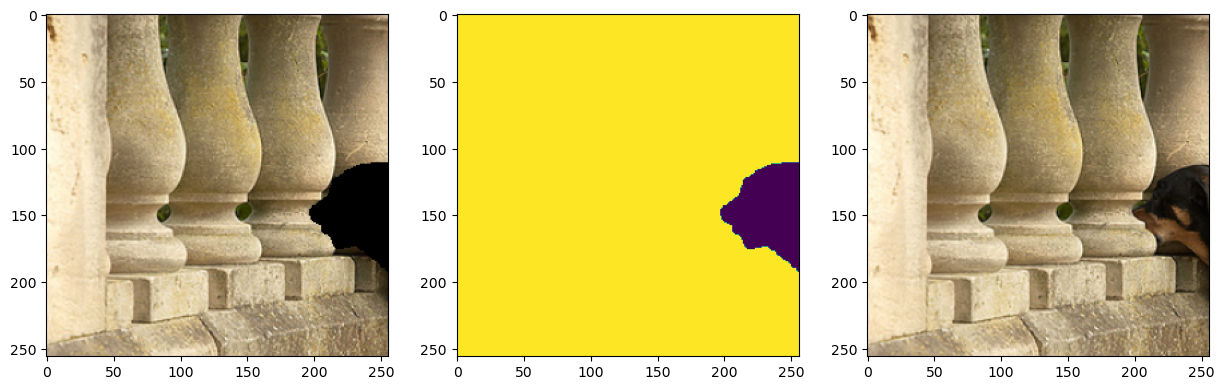

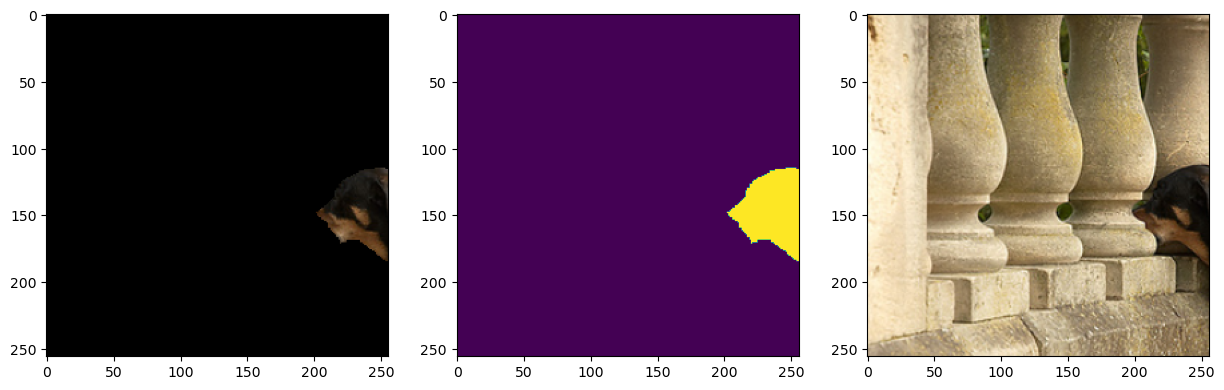

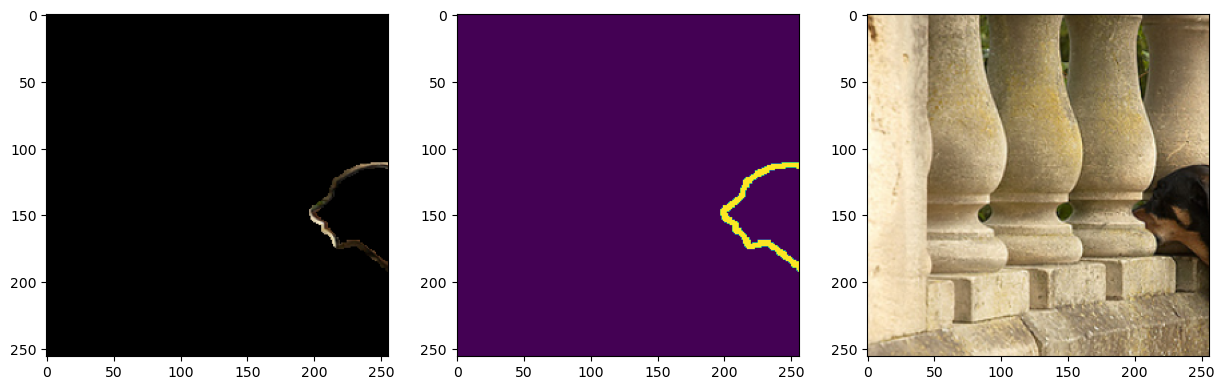

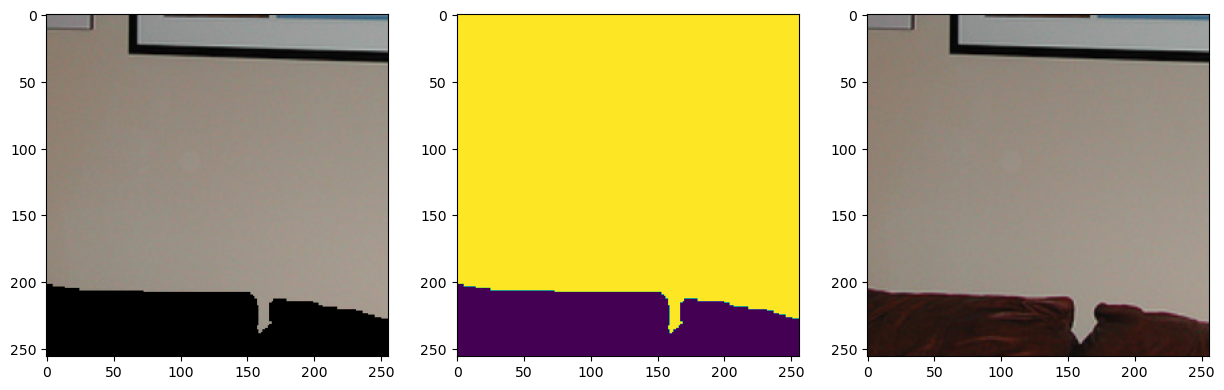

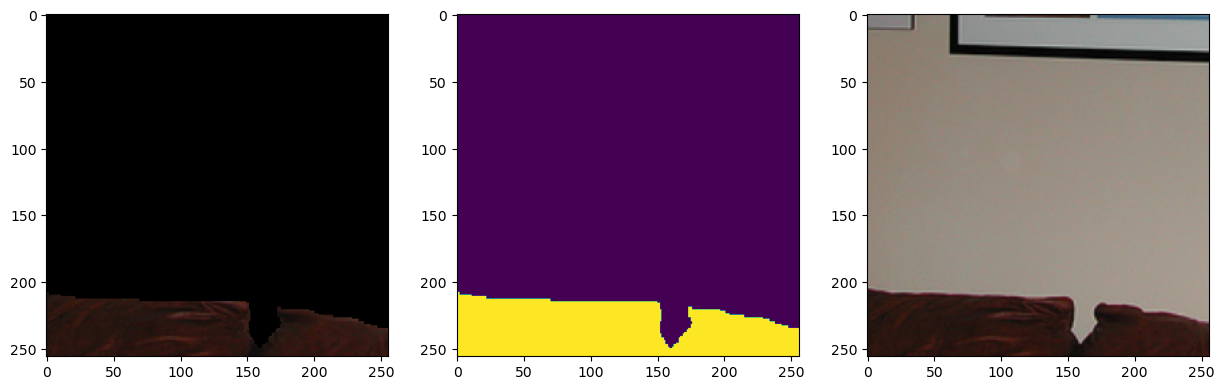

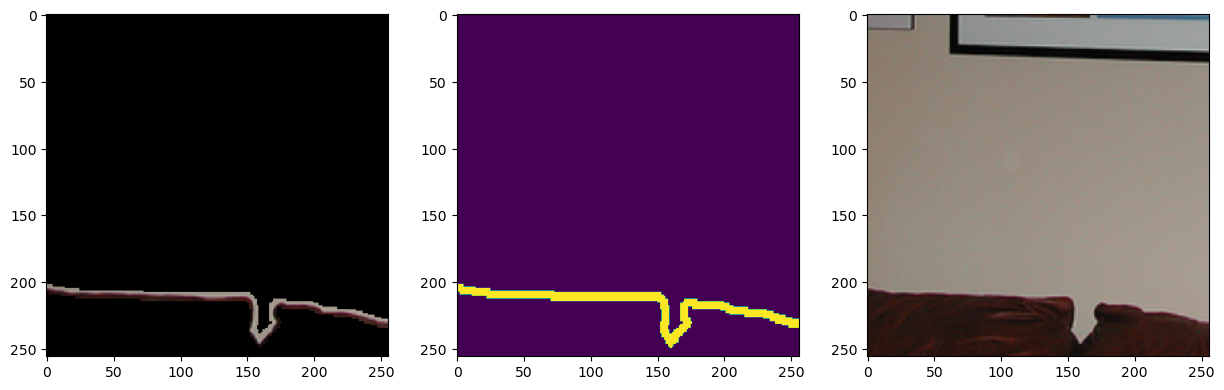

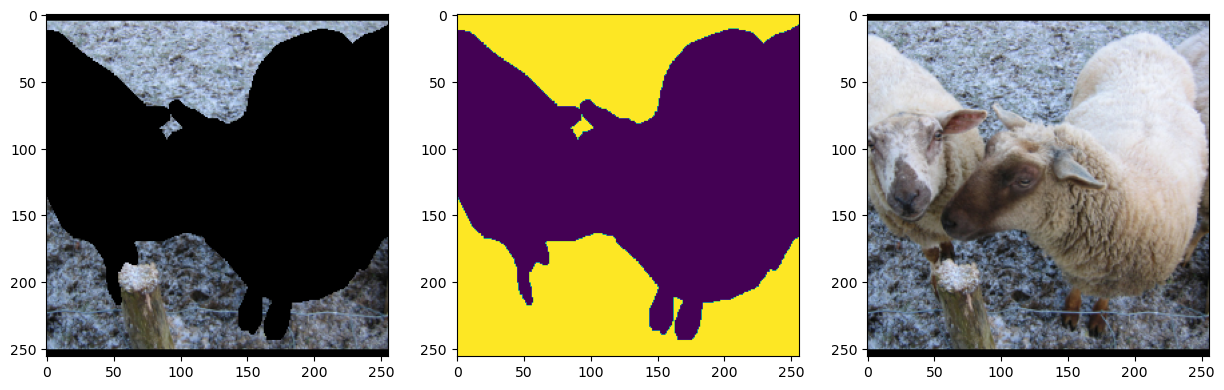

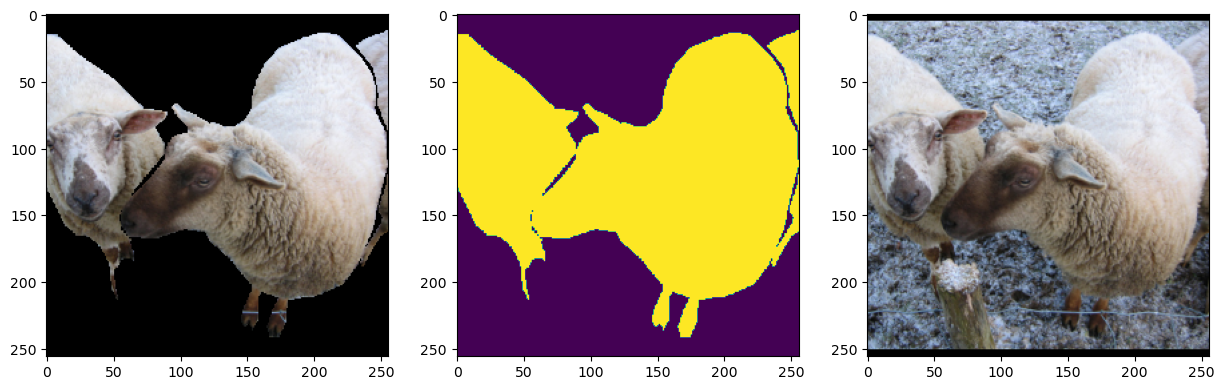

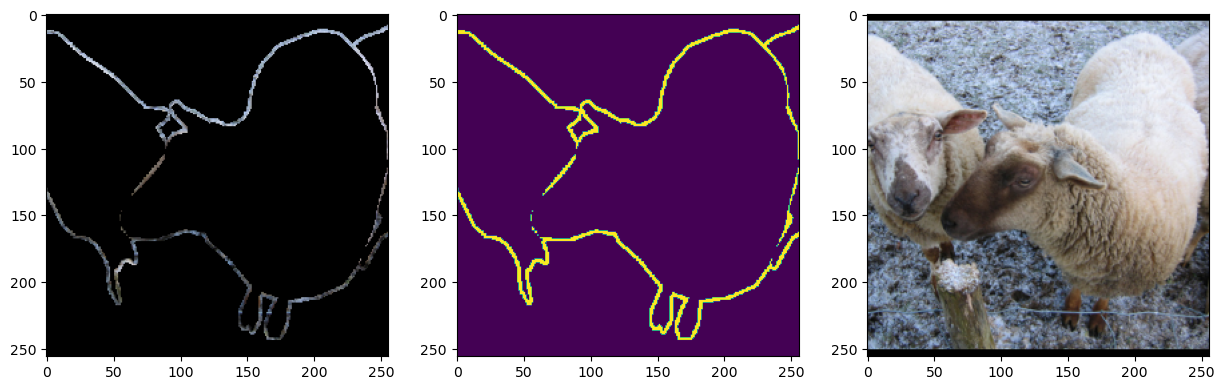

In [24]:
from matplotlib import pyplot as plt
import numpy as np

for img, label in train_loader:
    break
    
for i in range(3):
    c_img = img[i].permute(1,2,0)
    c_l = label[i].reshape([256,256,1])
    for curr_class in np.unique(c_l):
        f, axes = plt.subplots(1, 3, figsize=(15,15))
        axes[2].imshow(c_img)
        axes[1].imshow(c_l == curr_class)
        axes[0].imshow(c_img * (c_l == curr_class))